In [1]:
import numpy as np
import scipy.stats
from icecream import ic
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal, norm
%matplotlib inline

x = np.linspace(0.4, 1.2, 100)  # x for plotting purposes

Just importing patches `scipy.stats` dists

In [2]:
import StatsUtils.dists.Normal
import StatsUtils.dists.TruncatedNormal

`scipy.stats.truncnorm.altCtor` is a more convenient method to construct the dist.

In [3]:
initialD = scipy.stats.truncnorm.altCtor(mode=0.8, std=0.1, bounds=(0.0, 1.0))
truncNormPoints = initialD.rvs(1000)

Then points can be fitted. The method returns not only the resulting dist, but also the loss, if it is available.

In [4]:
dist, nnlf = scipy.stats.truncnorm.fitPointsMLE(truncNormPoints)
display(nnlf)

-950.1141627173024

`rv_empirical` is a distribution based on empirical CDF, transformed into PDF and smoothed with some kind of lowpass.

In [5]:
from StatsUtils.dists.empirical import rv_empirical

empirical = rv_empirical(points=truncNormPoints, k=3)

Distribution object stores grid in itself, so we can plot PDF

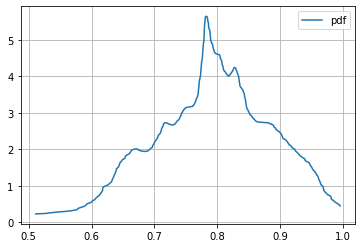

In [6]:
plt.plot(empirical.pdfX, empirical.pdfY, label="pdf")
plt.grid()
plt.legend()
plt.show()

For CDF we use interpolated one, CDF is not stored as it is, instead interpolation spline is stored

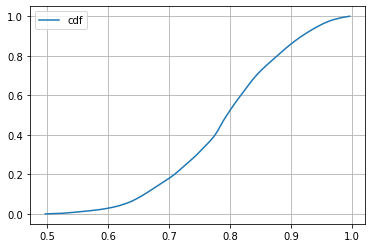

In [7]:
plt.plot(empirical.cdfX, empirical.cdf(empirical.cdfX), label="cdf")
plt.grid()
plt.legend()
plt.show()

We can adapd histograms bins to PDF change rate, so the error of approximation of PDF by hist to be almost the same for each bin

In [8]:
from StatsUtils.plot import plotPrecomputedHistogram

binEdges, freqs = dist.adaptiveHistogram(truncNormPoints, bins=20, density=True)

`plotPrecomputedHistogram` does exactly what it says. All the args are keywords ones.

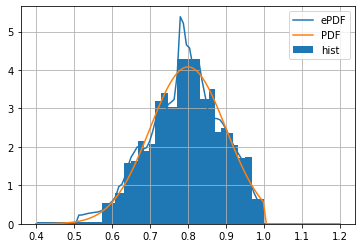

In [9]:
plotPrecomputedHistogram(edges=binEdges, freqs=freqs, label="hist")

plt.plot(x, empirical.pdf(x), label="ePDF")
plt.plot(x, initialD.pdf(x), label="PDF")
plt.legend()
plt.grid()
plt.show()

For comparison, here is a hist with uniform bins

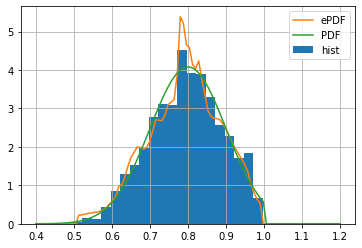

In [10]:
plt.hist(truncNormPoints, bins=20, density=True, label="hist")
plt.plot(x, empirical.pdf(x), label="ePDF")
plt.plot(x, initialD.pdf(x), label="PDF")
plt.legend()
plt.grid()
plt.show()

We provide convenient way to construct multivariate Gaussian distributions

In [11]:
from StatsUtils.dists.MultivariateGaussian import MultivariateGaussian

challengeAngle = 30 / 180 * np.pi
g = MultivariateGaussian(mode=np.array([10, -10]), stds=np.array([2, 8]), angles=challengeAngle)

We also have a function to plot a fitted 2D gaussian with KDE overlay using Seaborn

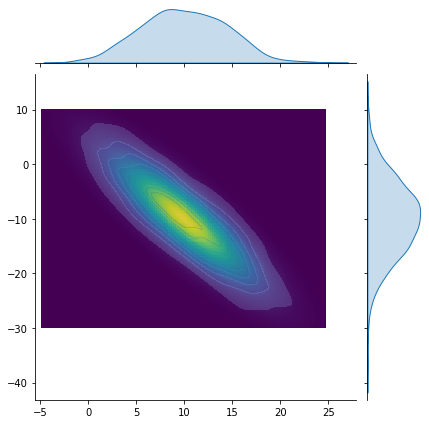

In [12]:
from StatsUtils.plot import seabornJointPlotWithGaussian

points = g.dist.rvs(1000)
jp, md, bounds = seabornJointPlotWithGaussian(points)